In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **1. Geo Map**

In [2]:
df=pd.read_csv("/content/gurgaon_properties_missing_value_imputation.csv")

In [3]:
df.shape

(3554, 18)

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [5]:
latlong = pd.read_csv('latlong.csv')

In [6]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [7]:
latlong['latitude'] = latlong['coordinates'].str.split(",").str.get(0).str.split('°').str.get(0).astype('float')

In [8]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [9]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [10]:
new_df = df.merge(latlong , on='sector')

In [11]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [12]:
new_df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,...,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,coordinates,latitude,longitude
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,"28.4160° N, 76.9914° E",28.416,76.9914
1,flat,avl 36 gurgaon,sector 36,0.75,7500.0,2.0,2.0,2,5.0,Relatively New,...,0.0,0.0,0.0,0.0,0.0,0.0,26.0,"28.4160° N, 76.9914° E",28.416,76.9914
2,flat,signature global park 4,sector 36,1.00,9901.0,3.0,2.0,3,2.0,New Property,...,0.0,0.0,0.0,0.0,0.0,0.0,128.0,"28.4160° N, 76.9914° E",28.416,76.9914
3,flat,krisumi waterfall residences,sector 36,4.10,15501.0,3.0,4.0,3,30.0,New Property,...,1.0,0.0,0.0,0.0,0.0,2.0,49.0,"28.4160° N, 76.9914° E",28.416,76.9914
4,flat,signature global park 4,sector 36,0.72,6660.0,3.0,2.0,3,3.0,Under Construction,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"28.4160° N, 76.9914° E",28.416,76.9914


In [13]:
group_df = new_df.groupby('sector').mean(pd.to_numeric)[['price','price_per_sqft','built_up_area','latitude','longitude']]

In [14]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 10,2.092857,11866.571429,1908.857143,28.4537,77.0009
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
...,...,...,...,...,...
sector 91,1.648235,7586.117647,2028.647059,28.4014,76.9225
sector 92,0.934000,5928.290000,1571.341800,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326


In [15]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [16]:
new_df.to_csv('data_viz1.csv',index=False)

# **Word Cloud**

In [17]:
df1 = pd.read_csv('gurgaon_properties.csv')

In [18]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,3 BHK Flat in Sector 83 Gurgaon,flat,vatika lifestyle homes,1.25,6839.0,1828.0,Super Built up area 1827.5(169.78 sq.m.),3,2,1,"servant room,study room,pooja room,store room","Tower 1, Sector 83 Gurgaon, Gurgaon, Haryana",6.0,South-West,1 to 5 Year Old,"['Sapphire 83 Mall', 'NH – 08', 'Knowledge Tre...","Combination of low-Rise, mid-Rise, and high-Ri...","['1 Water Purifier', '1 Fridge', '7 Fan', '1 E...","['Centrally Air Conditioned', 'Water purifier'...","['Green Area4.5 out of 5', 'Construction4 out ..."
1,4 BHK Flat in Sector 104 Gurgaon,flat,ats triumph,4.45,6846.0,6500.0,Carpet area: 6500 (603.87 sq.m.),4,5,3+,not available,"N/a, Sector 104 Gurgaon, Gurgaon, Haryana",27.0,North,1 to 5 Year Old,"['IFFCO Chowk Metro Station', 'The Esplanade M...",Ats triumph is one of the most popular destina...,[],"['Security / Fire Alarm', 'Power Back-up', 'Fe...","['Green Area4 out of 5', 'Construction5 out of..."
2,4 BHK Flat in Sector 111 Gurgaon,flat,puri diplomatic greens,3.50,11864.0,2950.0,Super Built up area 2950(274.06 sq.m.)Built Up...,4,5,3+,servant room,"Sector 111 Gurgaon, Gurgaon, Haryana",10.0,North-East,1 to 5 Year Old,"['Dwarka Sector 21 Metro Station', 'Gurgaon Dr...",Looking for a 4 bhk property for sale in gurga...,"['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '5 Ge...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Green Area5 out of 5', 'Construction5 out of..."
3,2 BHK Flat in Sector 102 Gurgaon,flat,shapoorji pallonji joyville gurugram,1.26,10041.0,1255.0,Super Built up area 1215(112.88 sq.m.),2,2,2,not available,"N/a, Sector 102 Gurgaon, Gurgaon, Haryana",10.0,North,1 to 5 Year Old,"['Khan Market', 'The Esplanade Mall', 'Dwarka ...",This lovely 2 bhk apartment/flat in sector 102...,[],"['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Green Area4 out of 5', 'Construction5 out of..."
4,3 BHK Flat in Sector 37D Gurgaon,flat,bptp terra,1.45,8006.0,1811.0,Super Built up area 1811(168.25 sq.m.)Built Up...,3,3,3,not available,"803, Sector 37D Gurgaon, Gurgaon, Haryana",8.0,South-East,1 to 5 Year Old,"['Airia Mall', 'Dwarka Expressway', 'Golf Cour...",This lovely 3 bhk apartment/flat in sector 37d...,"['5 AC', '1 Chimney', '1 Modular Kitchen', '2 ...","['Centrally Air Conditioned', 'Water purifier'...","['Green Area4.5 out of 5', 'Construction4.5 ou..."


In [19]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [20]:
wordcloud_df.head()

,features,sector
0,"['Centrally Air Conditioned', 'Water purifier'...",sector 36
1,"['Security / Fire Alarm', 'Power Back-up', 'Fe...",sector 89
2,"['Feng Shui / Vaastu Compliant', 'Security / F...",sohna road
3,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",sector 92
4,"['Centrally Air Conditioned', 'Water purifier'...",sector 102


In [21]:
import ast
main=[]
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
   main.extend(item)

In [22]:
main

['Centrally Air Conditioned',
 'Water purifier',
 'Security / Fire Alarm',
 'Power Back-up',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Intercom Facility',
 'Lift(s)',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Bank Attached Property',
 'Piped-gas',
 'Internet/wi-fi connectivity',
 'Recently Renovated',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Airy Rooms',
 'Spacious Interiors',
 'Low Density Society',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Water softening plant',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Security / Fire Alarm',
 'Power Back-up',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage aro

In [23]:
from wordcloud import WordCloud


In [24]:
feature_text = " ".join(main)

In [25]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

In [26]:
feature_text

'Centrally Air Conditioned Water purifier Security / Fire Alarm Power Back-up Feng Shui / Vaastu Compliant Private Garden / Terrace Intercom Facility Lift(s) High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Bank Attached Property Piped-gas Internet/wi-fi connectivity Recently Renovated Visitor Parking Swimming Pool Park Security Personnel Natural Light Airy Rooms Spacious Interiors Low Density Society Waste Disposal Rain Water Harvesting Water softening plant Shopping Centre Fitness Centre / GYM Club house / Community Center Security / Fire Alarm Power Back-up Feng Shui / Vaastu Compliant Intercom Facility Lift(s) High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Visitor Parking Swimming Pool Park Security Personnel Internet/wi-fi connectivity Fitness Centre / GYM Rain Water Harvesting Club house / Community Center Water soft

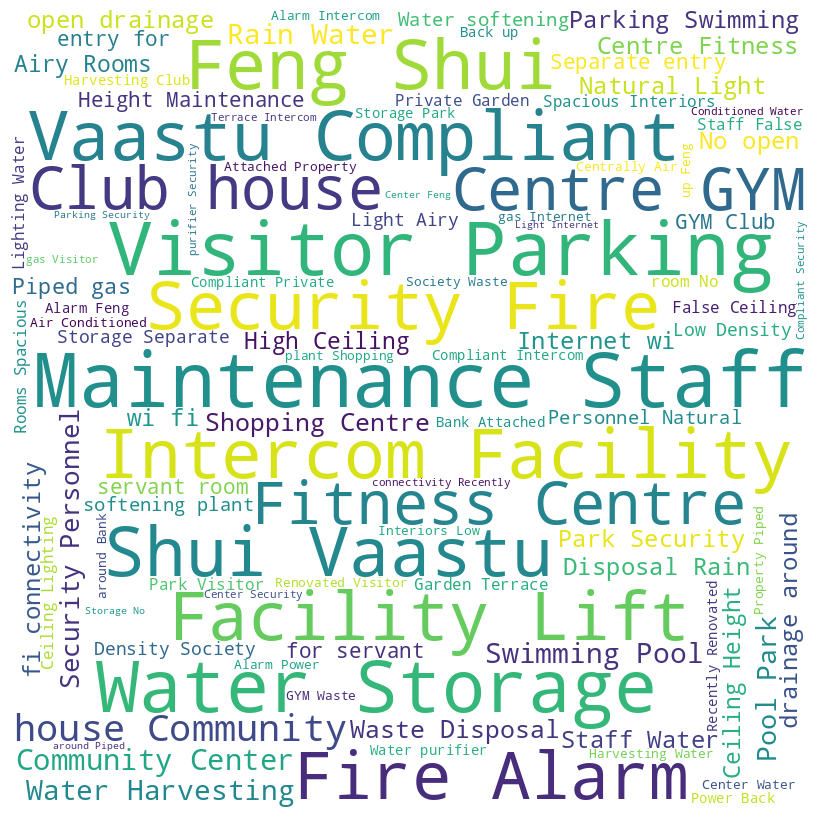

In [27]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show() # st.pyplot()

# **3. Sactter plot area vs price**

In [28]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

# **4. Pie chart filter by sector**

In [29]:
# overall
fig=px.pie(df,names='bedRoom',title='bhk')
fig.show()

# **5. side by side boxplot of bedroom price**

In [31]:
# 4 bbedroom tak hi liye h
temp_df=df[df['bedRoom'] <=4]
fig = px.box(temp_df,x='bedRoom',y='price',title='BHK Price Range')

fig.show()

## **displot of price of flat and houses **

<ipython-input-32-efaeb8794e78>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-32-efaeb8794e78>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

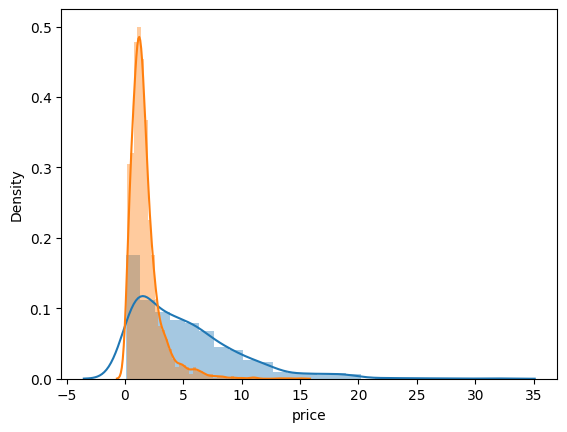

In [32]:
sns.distplot(df[df['property_type']=='house']['price'])
sns.distplot(df[df['property_type']=='flat']['price'])